In [27]:
import pandas as pd

In [28]:
data = pd.read_csv(r"C:\Users\marij\OneDrive\Desktop\PROJEKAT\churn_analysis.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

In [30]:
data.isnull().sum

<bound method DataFrame.sum of      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0         False   False          False    False       False   False   
1         False   False          False    False       False   False   
2         False   False          False    False       False   False   
3         False   False          False    False       False   False   
4         False   False          False    False       False   False   
..          ...     ...            ...      ...         ...     ...   
295       False   False          False    False       False   False   
296       False   False          False    False       False   False   
297       False   False          False    False       False   False   
298       False   False          False    False       False   False   
299       False   False          False    False       False   False   

     PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0           False          False          

In [17]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

In [33]:
#unique columns
for column in ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "InternetService", "Contract", "PaymentMethod", "Churn"]:
    print(f"{column}: {data[column].unique()}")


gender: ['Male' 'Female']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['No' 'Yes']
InternetService: ['No' 'DSL' 'Fiber optic']
Contract: ['Month-to-month' 'Two year' 'One year']
PaymentMethod: ['Credit card' 'Electronic check' 'Bank transfer' 'Mailed check']
Churn: ['Yes' 'No']


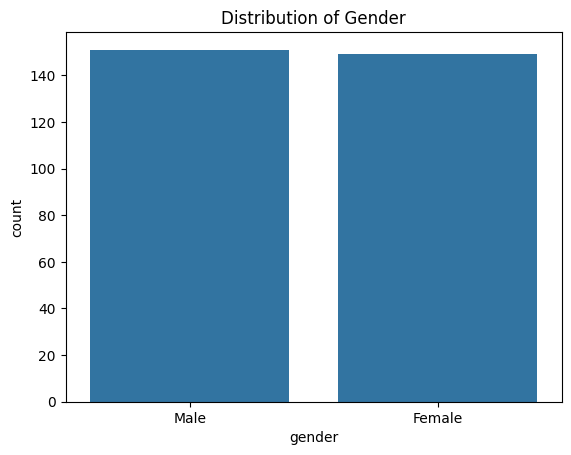

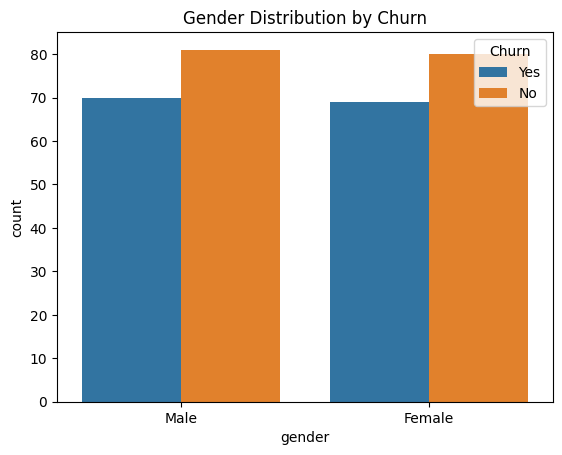

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution by Gender
sns.countplot(data=data, x='gender')
plt.title("Distribution of Gender")
plt.show()

sns.countplot(data=data, x='gender', hue='Churn')
plt.title("Gender Distribution by Churn")
plt.show()



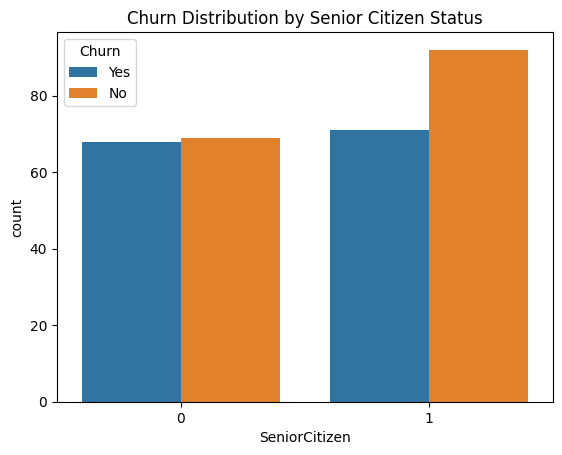

In [58]:
# Distribution of churn based on Senior Citizen Status
sns.countplot(data=data, x ="SeniorCitizen", hue="Churn")
plt.title("Churn Distribution by Senior Citizen Status")
plt.show()

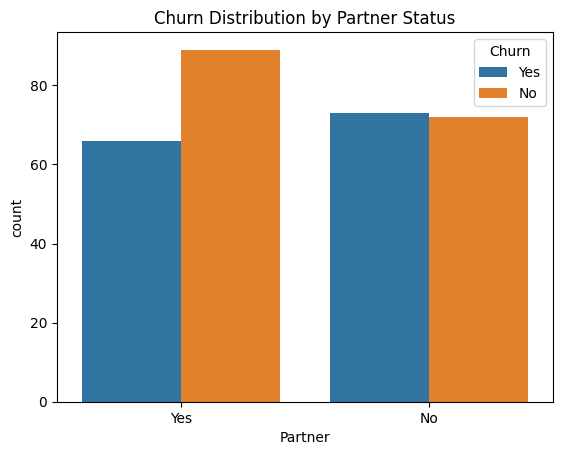

In [36]:
# Distribution of churn based on Partner Status
sns.countplot(data=data, x='Partner', hue='Churn')
plt.title("Churn Distribution by Partner Status")
plt.show()


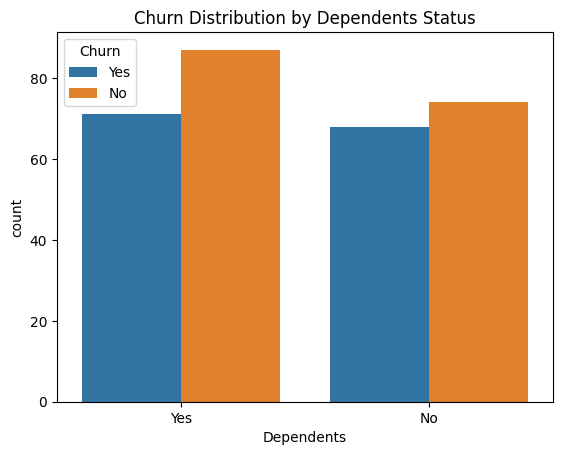

In [37]:
# Distribution of churn based on Dependents Status
sns.countplot(data=data, x='Dependents', hue='Churn')
plt.title("Churn Distribution by Dependents Status")
plt.show()

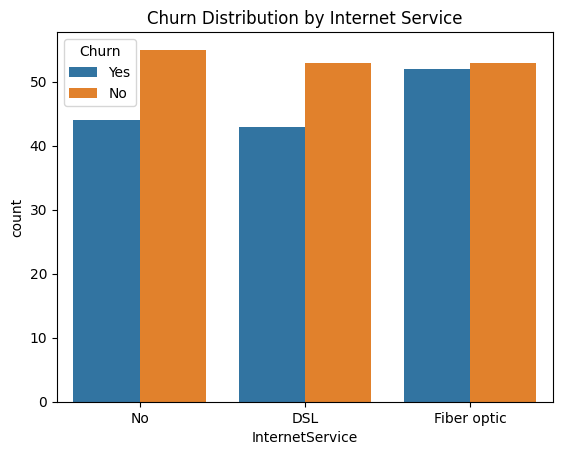

In [38]:
# Distribution of churn based on the InternetService
sns.countplot(data=data, x='InternetService', hue='Churn')
plt.title("Churn Distribution by Internet Service")
plt.show()


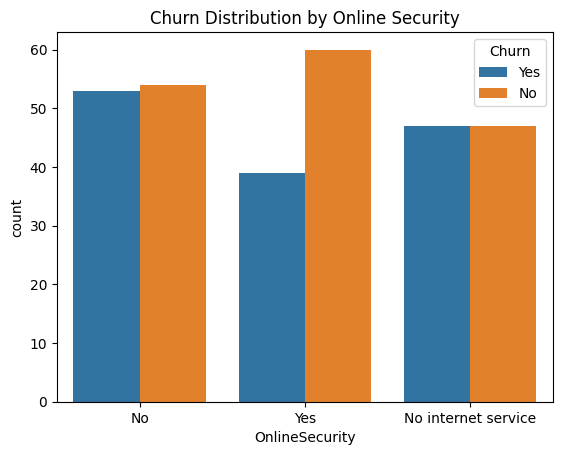

In [39]:
# Distribution of churn based on the OnlineSecurity
sns.countplot(data=data, x='OnlineSecurity', hue='Churn')
plt.title("Churn Distribution by Online Security")
plt.show()

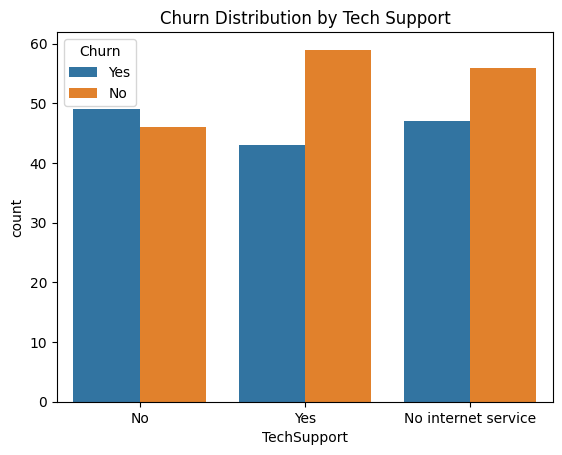

In [40]:
# Distribution of churn based on the TechSupport service
sns.countplot(data=data, x='TechSupport', hue='Churn')
plt.title("Churn Distribution by Tech Support")
plt.show()

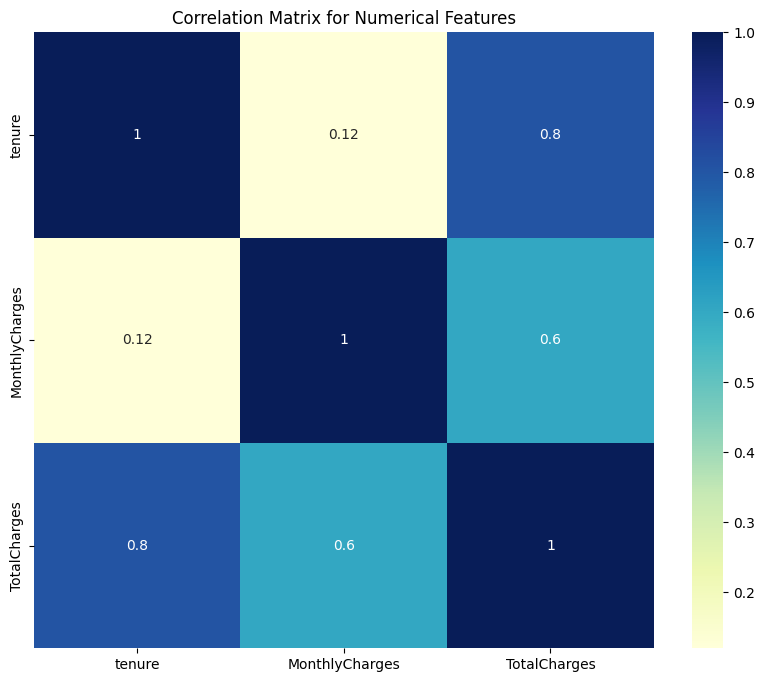

In [41]:
# Correlation matrix for numerical values
plt.figure(figsize=(10, 8))
sns.heatmap(data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix for Numerical Features")
plt.show()


Based on the correlation matrix for the numerical features (tenure, MonthlyCharges, and TotalCharges), we can draw the following conclusions:

High positive correlation between tenure (length of service) and TotalCharges (total charges) indicates that customers who have been using the service for a longer time tend to accumulate higher total charges. This is expected due to the cumulative nature of TotalCharges.

Moderate positive correlation between MonthlyCharges (monthly charges) and TotalCharges suggests that customers with higher monthly charges typically have higher total charges. This relationship is logical, as higher monthly bills accumulate over time.

Low correlation between tenure and MonthlyCharges shows that monthly charges are not significantly associated with the length of service. In other words, the amount a customer pays monthly is not necessarily influenced by how long they have been a customer.

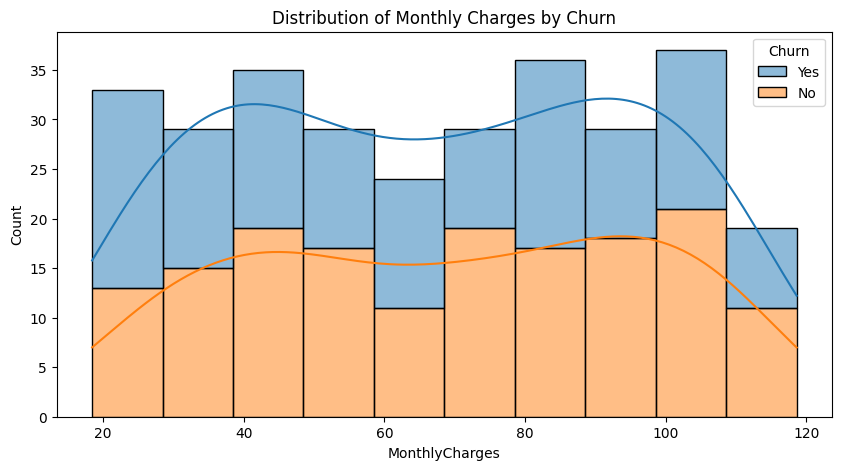

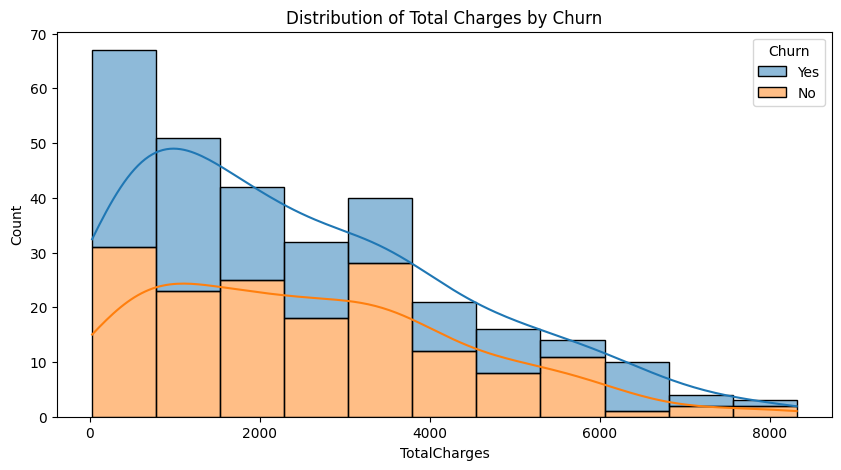

In [60]:
# Histogram mesečnih troškova prema churn statusu
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="MonthlyCharges", hue="Churn", kde=True, multiple="stack")
plt.title("Distribution of Monthly Charges by Churn")
plt.show()

# Histogram ukupnih troškova prema churn statusu
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="TotalCharges", hue="Churn", kde=True, multiple="stack")
plt.title("Distribution of Total Charges by Churn")
plt.show()


Higher Monthly Charges are associated with a higher likelihood of churn, suggesting that cost-sensitive customers may be leaving due to pricing concerns.
<br>Lower Total Charges are also associated with higher churn, possibly indicating that newer customers are more likely to leave.
<br>Improving the experience for new customers could be beneficial.



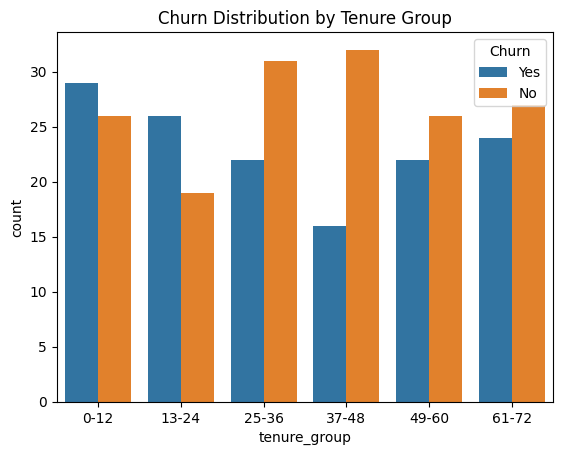

In [61]:
# Categorization 
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
data['tenure_group'] = pd.cut(data['tenure'], bins=bins, labels=labels)

# Visualization of churn by tenure groups
sns.countplot(data=data, x='tenure_group', hue='Churn')
plt.title("Churn Distribution by Tenure Group")
plt.show()


Since the churn rate is high among new customers, it would be beneficial to focus on strategies to retain customers within their first year. This might include improving the onboarding experience, offering promotional incentives, or providing better customer support during this critical period.
Loyalty Programs for Long-Term Customers: While long-term customers tend to stay, implementing loyalty programs or rewards for these customers could further reduce churn and enhance customer satisfaction.

# CONCLUSION

The analysis suggests that a dual approach focusing on early retention and rewarding long-term loyalty would be effective in reducing churn. Investing in an improved customer onboarding experience, offering flexible pricing, and promoting value-added services could help retain more customers in the long run. By focusing on customer satisfaction from the start and nurturing loyalty over time, the company can build a more stable and satisfied customer base.

These insights provide a foundation for data-driven decision-making to improve customer retention and ultimately support the company’s growth and profitability.